# HW4

## Name: Reem Almijmaj
## Github Username: reemabdullah888
## USC ID: 3217747723

In [1]:
import pandas as pd
import numpy as np 
import os
from scipy.stats import bootstrap
import seaborn as seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from statistics import mean
from statistics import median
from statistics import stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# HW3, OLD CODED!

In [2]:
# DO NOT RUN THIS CELL.

#code to check the dataset (preprocessing) if it has any missing data

# # assign dataset names
# list_of_names = ['dataset1','dataset2','dataset3','dataset4','dataset5' , 'dataset6','dataset7']
 
# # create empty list
# dataframes_list = []
 
# # append datasets into the list
# for i in range(len(list_of_names)):
#     temp_df = pd.read_csv("../data/AReM/bending1/"+list_of_names[i]+".csv",skiprows=4)
#     dataframes_list.append(temp_df)

# # checking different missing values in the first folder
# missing_values = ['NA',"",None,np.NaN]

# for i in range(len(dataframes_list)):
#     missing= dataframes_list[i].isin(missing_values).sum().sum()
  
#     display(missing)

# # count number of rows in each dataset    
# for i in range(len(list_of_names)):
#     print('number of rows in dataset', list_of_names[i],'  is  ',dataframes_list[i].shape[0] )
    

## 1 (a) & (b)

In [3]:
#Preparing test for bending folder
test_bending_files = ['dataset1.csv', 'dataset2.csv']

path = '../data/AReM/bending1/'
path2 = '../data/AReM/bending2/'

# create empty list
dataframe_list = []
 
# append datasets to the list
for i in range(len(test_bending_files)):
    temp_df = pd.read_csv(path+test_bending_files[i],skiprows=4)
    dataframe_list.append(temp_df)
    
for i in range(len(test_bending_files)):
    temp_df = pd.read_csv(path2+test_bending_files[i],skiprows=4)
    dataframe_list.append(temp_df)   

virtical_b_test = pd.concat(dataframe_list,axis=1)

combiend_b_test= pd.concat(dataframe_list) 
combiend_b_test['class'] = 'bending'
# display(combiend_b_test)


In [4]:
#Preparing traing for bending folder
path = '../data/AReM/bending1/'
path_b2 = '../data/AReM/bending2/'
b_file_list = os.listdir(path)[2:]
b2_file_list = os.listdir(path_b2)[2:]




# create empty list
dataframes_list = []
 
# append datasets to the list
for i in range(len(b_file_list)):
    temp_df = pd.read_csv(path+b_file_list[i],skiprows=4)
    dataframes_list.append(temp_df)
    
for i in range(len(b2_file_list)):
    temp_df = pd.read_csv(path_b2+b2_file_list[i],skiprows=4)
    dataframes_list.append(temp_df)   

virtical_b_train = pd.concat(dataframes_list,axis=1) 

combiend_b_train = pd.concat(dataframes_list) 
combiend_b_train['class'] = 'bending'
# display(combiend_b_train)

In [5]:
# prepare other folder Training
# folder_list= os.listdir('../data/AReM/lying')
# folder_list

generl_path = '../data/AReM/'
# To take a list of dataset names
datasets_li = os.listdir('../data/AReM/lying')

test_list_other = ['dataset1.csv','dataset2.csv', 'dataset3.csv']
other_folder = ['cycling','lying','sitting','standing','walking']





#taking training set of lying folder
df_list = []
for j in range(len(other_folder)):
    for i in range (len(datasets_li)):
        if datasets_li[i] in test_list_other: continue
        else:
            temp_df = pd.read_csv(generl_path+ other_folder[j]+'/'+datasets_li[i] ,skiprows=4)
            df_list.append(temp_df)




virtical_other_train = pd.concat(df_list,axis=1) 

combiend_other_train = pd.concat(df_list) 
combiend_other_train['class'] = 'unbending'
# display(combiend_other_train)




In [6]:
#prepare other folder test data

#taking training set of lying folder
df_list = []
for j in range(len(other_folder)):
    for i in range (len(test_list_other)):
        temp_df = pd.read_csv(generl_path + other_folder[j]+'/'+test_list_other[i] ,skiprows=4)
        df_list.append(temp_df)

        

# print(len(df_list))
virtical_other_test = pd.concat(df_list,axis=1)   

combiend_other_test = pd.concat(df_list) 
combiend_other_test['class'] = 'unbending'
# display(combiend_other_test)


In [7]:
# Final traning and testing datasets


train_data = pd.concat([combiend_b_train, combiend_other_train])

test_data= pd.concat([combiend_b_test, combiend_other_test])



print("The final training data is: \n")
# display(train_data)
df_train_data_all_features = train_data.copy()
display(df_train_data_all_features)
print("\n The final testing data is: \n")
display(test_data)

The final training data is: 



# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      31.50       1.66      12.50       3.20      14.25   
476           119000      27.33       1.25      11.33       0.94      20.00   
477           119250      37.80       7.68      14.20       2.48      17.25   
478           119500      33.75       1.30      15.75       5.21      16.50   
479           119750      32.67       3.09      18.67       0.47      14.00   

     var_rss23      class  
0         0.00    bending  
1         1.09    bending  
2         0.00    bending  
3         0.00    bending  
4         0.43    bending  
..         ...        ...  
475       4.44  unbending  
476       4.00  unbending  
477       0.83  unbending  
478       2.69  unbending  
479       3.16  unbending  

[33119 rows x 8 columns]


 The final testing data is: 



# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      39.25       0.43      22.75       0.43      33.75   
1                250      39.25       0.43      23.00       0.00      33.00   
2                500      39.25       0.43      23.25       0.43      33.00   
3                750      39.50       0.50      23.00       0.71      33.00   
4               1000      39.50       0.50      24.00       0.00      33.00   
..               ...        ...        ...        ...        ...        ...   
475           118750      36.00       2.45      17.00       5.10      20.50   
476           119000      34.33       1.89      15.00       2.45      17.00   
477           119250      33.00       7.35      14.60       3.14      13.00   
478           119500      31.67       1.25      11.00       6.16      19.25   
479           119750      30.75      10.21      11.75       1.09      18.50   

     var_rss23      class  
0         1.30    bending  
1         0.00    bending  
2         0.00    bending  
3         0.00    bending  
4         0.00    bending  
..         ...        ...  
475       0.87  unbending  
476       2.12  unbending  
477       5.70  unbending  
478       2.17  unbending  
479       3.20  unbending  

[9120 rows x 8 columns]

Resources:

https://www.geeksforgeeks.org/read-multiple-csv-files-into-separate-dataframes-in-python/  <br>
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/ <br>
https://towardsdatascience.com/how-to-read-multiple-csv-files-non-iteratively-and-without-pandas-984fd954999c <br>
https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/

# C (i)
<br> 
* Means in each of the d dimensions
<br>
* Standard deviations of the d dimensions
<br>
* Skewness, Kurtosis and Higher order moments of the d dimensions
<br>
* Maximum and Minimum values
<br>
* median
<br>
* first quartile, second quartile, third quartile
<br>
variance
<br>
Some of time series features are used to facilitate to fit time series into a range of time series models. Such as
<br>
 1) distribution
<br>
2) Correlation structure <br> 3) entropy <br> 4) stationarity and scaling properties <br> 






Resources:
<br>
https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
<br>
https://medium.datadriveninvestor.com/time-series-classification-using-feature-extraction-16209570a22e

In [8]:
# prepare data for extracting the feautres


# train_data_v = pd.concat([virtical_b_train, virtical_other_train], axis=1)

# test_data_v = pd.concat([virtical_b_test, virtical_other_test],axis=1)


# # del train_data_v['# Columns: time']
# # del test_data_v['# Columns: time']
# print("The final training data is: \n")
# display(train_data_v)
# print("\n The final testing data is: \n")
# display(test_data_v)

In [122]:
# repeated code with different tech

generl_path = '../data/AReM/'
# To take a list of dataset names
# dataset_l = os.listdir('../data/AReM/lying')
folders = ['cycling','lying','sitting','standing','walking']
datasets= ['dataset1.csv', 'dataset2.csv', 'dataset3.csv', 'dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv', 'dataset8.csv', 'dataset9.csv', 'dataset10.csv', 'dataset11.csv', 'dataset12.csv', 'dataset13.csv', 'dataset14.csv', 'dataset15.csv']


# create df lists
df_list = []
for folder in range(len(folders)):
    for file in range(len(datasets)):
        temp_df = pd.read_csv(generl_path+folders[folder]+'/'+datasets[file],skiprows=4)
        df_list.append(temp_df)
        
        
# df_other = pd.concat(df_list , axis=1)
# del df_other['# Columns: time']
# # display(df_other)



f = ['bending1','bending2']
df_l = []
for i in range(1):
    for file in range(len(datasets[:7])):
        temp_df = pd.read_csv(generl_path+'bending1'+'/'+datasets[file],skiprows=4)
        df_l.append(temp_df)
    for file in range(len(datasets[:6])):
        temp_df = pd.read_csv(generl_path+'bending2'+'/'+datasets[file],skiprows=4)
        df_l.append(temp_df)
# df_b = pd.concat(df_l, axis=1)
# del df_b['# Columns: time'] 


# df_dataset = pd.concat([df_b,df_other],axis=1)
# display(df_dataset)

df_all = df_l+df_list



In [156]:
variables = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
col_num= ['1', '2', '3', '4', '5', '6']
col_names = []
for i in col_num:
    col_names.append('Min'+i)
    col_names.append('Max'+i)
    col_names.append('Mean'+i)
    col_names.append('Median'+i)
    col_names.append('Sd'+i)
    col_names.append('1st_quartile'+i)
    col_names.append('3rd_quartile'+i)

df_col = pd.DataFrame(columns=col_names)

# instances = []
# for item in range(1,89,1):
#     instances.append(int(item))
    
    
for df in df_all:
    lis_stat = []
    for col in variables:
        lis_stat.append(min(df[col]))
        lis_stat.append(max(df[col]))
        lis_stat.append(df[col].mean())
        lis_stat.append(df[col].median())
        lis_stat.append(df[col].std())
        lis_stat.append(np.percentile(df[col],25))
        lis_stat.append(np.percentile(df[col],75))
    df_col.loc[len(df_col.index)] = lis_stat
df_col.index += 1 
df_col


Min1   Max1      Mean1  Median1       Sd1  1st_quartile1  3rd_quartile1  \
1   37.25  45.00  40.624792    40.50  1.476967          39.25        42.0000   
2   38.00  45.67  42.812812    42.50  1.435550          42.00        43.6700   
3   35.00  47.40  43.954500    44.33  1.558835          43.00        45.0000   
4   33.00  47.75  42.179813    43.50  3.670666          39.15        45.0000   
5   33.00  45.75  41.678063    41.75  2.243490          41.33        42.7500   
..    ...    ...        ...      ...       ...            ...            ...   
84  19.50  45.33  33.586875    34.25  4.650935          30.25        37.0000   
85  19.75  45.50  34.322750    35.25  4.752477          31.00        38.0000   
86  19.50  46.00  34.546229    35.25  4.842294          31.25        37.8125   
87  23.50  46.25  34.873229    35.25  4.531720          31.75        38.2500   
88  19.25  44.00  34.473188    35.00  4.796705          31.25        38.0000   

    Min2   Max2     Mean2  ...       Sd5  1st_quartile5  3rd_quartile5  Min6  \
1    0.0   1.30  0.358604  ...  2.188449        33.0000          36.00  0.00   
2    0.0   1.22  0.372438  ...  1.995255        32.0000          34.50  0.00   
3    0.0   1.70  0.426250  ...  1.999604        35.3625          36.50  0.00   
4    0.0   3.00  0.696042  ...  3.849448        30.4575          36.33  0.00   
5    0.0   2.83  0.535979  ...  2.411026        28.4575          31.25  0.00   
..   ...    ...       ...  ...       ...            ...            ...   ...   
84   0.0  14.67  4.576562  ...  3.283983        13.7300          18.25  0.00   
85   0.0  13.47  4.456333  ...  3.119856        13.5000          17.75  0.00   
86   0.0  12.47  4.371958  ...  2.823124        14.0000          17.75  0.00   
87   0.0  14.82  4.380583  ...  3.131076        13.7500          18.00  0.00   
88   0.0  13.86  4.359312  ...  3.156320        13.7300          17.75  0.43   

     Max6     Mean6  Median6       Sd6  1st_quartile6  3rd_quartile6  
1    1.92  0.570583     0.43  0.582915         0.0000         1.3000  
2    3.11  0.571083     0.43  0.601010         0.0000         1.3000  
3    1.79  0.493292     0.43  0.513506         0.0000         0.9400  
4    2.18  0.613521     0.50  0.524317         0.0000         1.0000  
5    1.79  0.383292     0.43  0.389164         0.0000         0.5000  
..    ...       ...      ...       ...            ...            ...  
84   8.32  3.259729     3.11  1.640243         2.0500         4.3225  
85   9.67  3.432562     3.20  1.732727         2.1575         4.5650  
86  10.00  3.338125     3.08  1.656742         2.1600         4.3350  
87   9.51  3.424646     3.27  1.690960         2.1700         4.5000  
88   9.00  3.340458     3.09  1.699114         2.1200         4.3750  

[88 rows x 42 columns]

# C (iii)
# Estimate standard deviation

In [11]:
# std_values = list(df_col.std())
# df_std = pd.DataFrame(index=col_names)
# df_std['standard_deviation']=std_values


# df_std

Resources:
    <br>
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

# C(iii) confidence interval values

In [12]:


# ci_ = []
# for col in df_col:
#     try: 
#         data = (df_col[col],)
#         res = bootstrap(data, np.std, confidence_level=0.9)
#         ci_.append((res.confidence_interval[0],res.confidence_interval[1]))
#     except:
        
#         ci_.append('(0.0,0.0)')
# df_std = pd.DataFrame(index=col_names)
# df_std['standard_deviation']=std_values
# df_std['confidence_interval']=ci_
# # df_std


# Resources:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

## C (iv)

In [13]:
# # convert df to list to calculate difference
# ci_list =list(df_std['confidence_interval'])

# #finding the difference in high and low ci
# diff_ci =[]
# for i in ci_list:
#     try:
#         diff_ci.append(i[1]-i[0])
        
#     except:
#         diff_ci.append(0)
# df_std['difference_ci']= diff_ci
# # df.iloc[2:4].sum().plot.bar()
# # df_std.groupby(by=["difference_ci"]).sum()
# print(' This is showing the difference between the high and low score of each statistic')
# df_std


In [14]:
# # col_name.clear()
# col_name = []
# for i in range(1,7):
    
#     col_name.append('Min')
#     col_name.append('Max')
#     col_name.append('Mean')
#     col_name.append('Median')
#     col_name.append('Sd')
#     col_name.append('1st_quartile')
#     col_name.append('3rd_quartile')

# df_std.reset_index()
# df_std.index=col_name
# df_std.index.name = 'statistic'
# df_std

# stat_df = df_std.groupby('statistic').difference_ci.sum()

# stat_df.plot.bar()
# print('As you can see, I have calculated the difference in CI limit (high - low) for each statistic')

## The 3 most important time-domain features are [ standard devation, median, mean]. 
<br>
Because if I have a low difference in ci my model going to be less flexible, but if the difference in CI was high, my model will be more flexible. In addition, Median, mean and standard devation will tell us how our data is spread out.



### Resources:
<br> 
 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
<br> 
 https://stackoverflow.com/questions/50218532/sum-of-specific-rows-in-a-dataframe-pandas

## ISLR 3.4.7

a) 
Because the true relationship between X and Y is linear, I would expect the training RSS to be lower for the cubic regression. One reason is that Cubic regression is more flexible than linear regression which means the model will have some overfitting problems. 

b) I would expect the test RSS to be lower for the linear regression than the cubic regression Because the true relationship between X and Y is linear, the cubic model will overfitting the data and get more wrong data. In the other hand, the linear regression model will likely be better in terms of generalization 

c) The cubic regression will fit the training set better because it has less training RSS than the simple linear regression. Because when we have a flexible model, the training dataset will have less error(RSS).  

d)  (No adequate information) We can't be certain about which model would has a small test RSS because we do not know how far from linear the true relationship between X and Y is. If the true relationship was closed to the linear than cubic, the simple linear regression would have a smaller test RSS. On the other hand, If the true relationship is closer to cubic, the cubic regression will fit better and have a smaller RSS.

# HW4

In [2]:
# Create train data


generl_path = '../data/AReM/'
# To take a list of dataset names
# dataset_l = os.listdir('../data/AReM/lying')
folders = ['cycling','lying','sitting','standing','walking']
train_d= [ 'dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv', 'dataset8.csv', 'dataset9.csv', 'dataset10.csv', 'dataset11.csv', 'dataset12.csv', 'dataset13.csv', 'dataset14.csv', 'dataset15.csv']


# create df lists
df_list_other_train = []

for folder in range(len(folders)):
    for file in range(len(train_d)):
        temp_df = pd.read_csv(generl_path+folders[folder]+'/'+train_d[file],skiprows=4)
        df_list_other_train.append(temp_df)
        

train_b= [ 'dataset3.csv','dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv']
f = ['bending1','bending2']
df_list_bending_train = []
for i in range(1):
    for file in range(len(train_b)):
        temp_df = pd.read_csv(generl_path+'bending1'+'/'+train_b[file],skiprows=4)
        df_list_bending_train.append(temp_df)
    for file in range(len(train_b[:4])):
        temp_df = pd.read_csv(generl_path+'bending2'+'/'+train_b[file],skiprows=4)
        df_list_bending_train.append(temp_df)
        
# df_list_bending_train['class'] = 'bending'       
# This is all the df lists of tranind datasets from both bending and others


# for i in df_list_bending_train:
#     display(i[:])



#all traning data dfs for both bending and others
df_list_all_train = df_list_bending_train+df_list_other_train

# col_list = []
# for df in df_list_all_train:
#     # Using Series.values.tolist()
#     col_list.append(df['class'].values.tolist())
 

# for i in df_list_all_train:
#     display(i[:])

# A (i)

In [3]:
# only 3 features

variables = ['avg_rss12', 'var_rss12', 'var_rss23']
columns=['1','2','3']
col_names=[]
for i in columns:

    col_names.append('Mean'+i)
    col_names.append('Median'+i)
    col_names.append('Sd'+i)

# col_names.append('class') 

    
df_col_b = pd.DataFrame(columns=col_names)


for df in df_list_bending_train:
    lis_stat = []
    for col in variables:
        lis_stat.append(df[col].mean())
        lis_stat.append(df[col].median())
        lis_stat.append(df[col].std())
    df_col_b.loc[len(df_col_b.index)] = lis_stat
df_col_b.index += 1 
df_col_b['Class']='bending'
display(df_col_b)

df_col_other = pd.DataFrame(columns=col_names)
for df in df_list_other_train:
    lis_stat = []
    for col in variables:
        lis_stat.append(df[col].mean())
        lis_stat.append(df[col].median())
        lis_stat.append(df[col].std())
    df_col_other.loc[len(df_col_other.index)] = lis_stat
df_col_other.index += 1 
df_col_other['Class']='unbending'

# display(df_col_other)
df_train_all =pd.concat([df_col_b,df_col_other])



Mean1  Median1       Sd1     Mean2  Median2       Sd2     Mean3  \
1  43.954500    44.33  1.558835  0.426250     0.47  0.338690  0.493292   
2  42.179813    43.50  3.670666  0.696042     0.50  0.630860  0.613521   
3  41.678063    41.75  2.243490  0.535979     0.50  0.405469  0.383292   
4  43.454958    43.25  1.386098  0.378083     0.47  0.315566  0.679646   
5  43.969125    44.50  1.618364  0.413125     0.47  0.263111  0.555313   
6  32.586208    33.00  6.238143  0.516125     0.43  0.789957  1.162042   
7  29.881938    30.00  1.153837  0.256438     0.00  0.275833  0.701625   
8  30.938104    29.00  7.684146  0.467167     0.43  0.734444  1.107354   
9  31.058250    29.71  4.829794  0.405458     0.43  0.566668  1.098104   

   Median3       Sd3    Class  
1     0.43  0.513506  bending  
2     0.50  0.524317  bending  
3     0.43  0.389164  bending  
4     0.50  0.622534  bending  
5     0.49  0.487826  bending  
6     0.83  1.332980  bending  
7     0.71  0.481103  bending  
8     0.83  1.080842  bending  
9     0.94  0.831480  bending

In [4]:
df_train_all.replace("bending", 1, inplace=True)
df_train_all.replace("unbending", 0, inplace=True)
df_train_all

Mean1  Median1       Sd1     Mean2  Median2       Sd2     Mean3  \
1   43.954500    44.33  1.558835  0.426250    0.470  0.338690  0.493292   
2   42.179813    43.50  3.670666  0.696042    0.500  0.630860  0.613521   
3   41.678063    41.75  2.243490  0.535979    0.500  0.405469  0.383292   
4   43.454958    43.25  1.386098  0.378083    0.470  0.315566  0.679646   
5   43.969125    44.50  1.618364  0.413125    0.470  0.263111  0.555313   
..        ...      ...       ...       ...      ...       ...       ...   
56  33.586875    34.25  4.650935  4.576562    4.260  2.461077  3.259729   
57  34.322750    35.25  4.752477  4.456333    3.900  2.599284  3.432562   
58  34.546229    35.25  4.842294  4.371958    4.135  2.360448  3.338125   
59  34.873229    35.25  4.531720  4.380583    3.925  2.435437  3.424646   
60  34.473188    35.00  4.796705  4.359312    3.960  2.388746  3.340458   

    Median3       Sd3  Class  
1      0.43  0.513506      1  
2      0.50  0.524317      1  
3      0.43  0.389164      1  
4      0.50  0.622534      1  
5      0.49  0.487826      1  
..      ...       ...    ...  
56     3.11  1.640243      0  
57     3.20  1.732727      0  
58     3.08  1.656742      0  
59     3.27  1.690960      0  
60     3.09  1.699114      0  

[69 rows x 10 columns]

In [5]:
df_train_all = df_train_all.reset_index(drop=True)

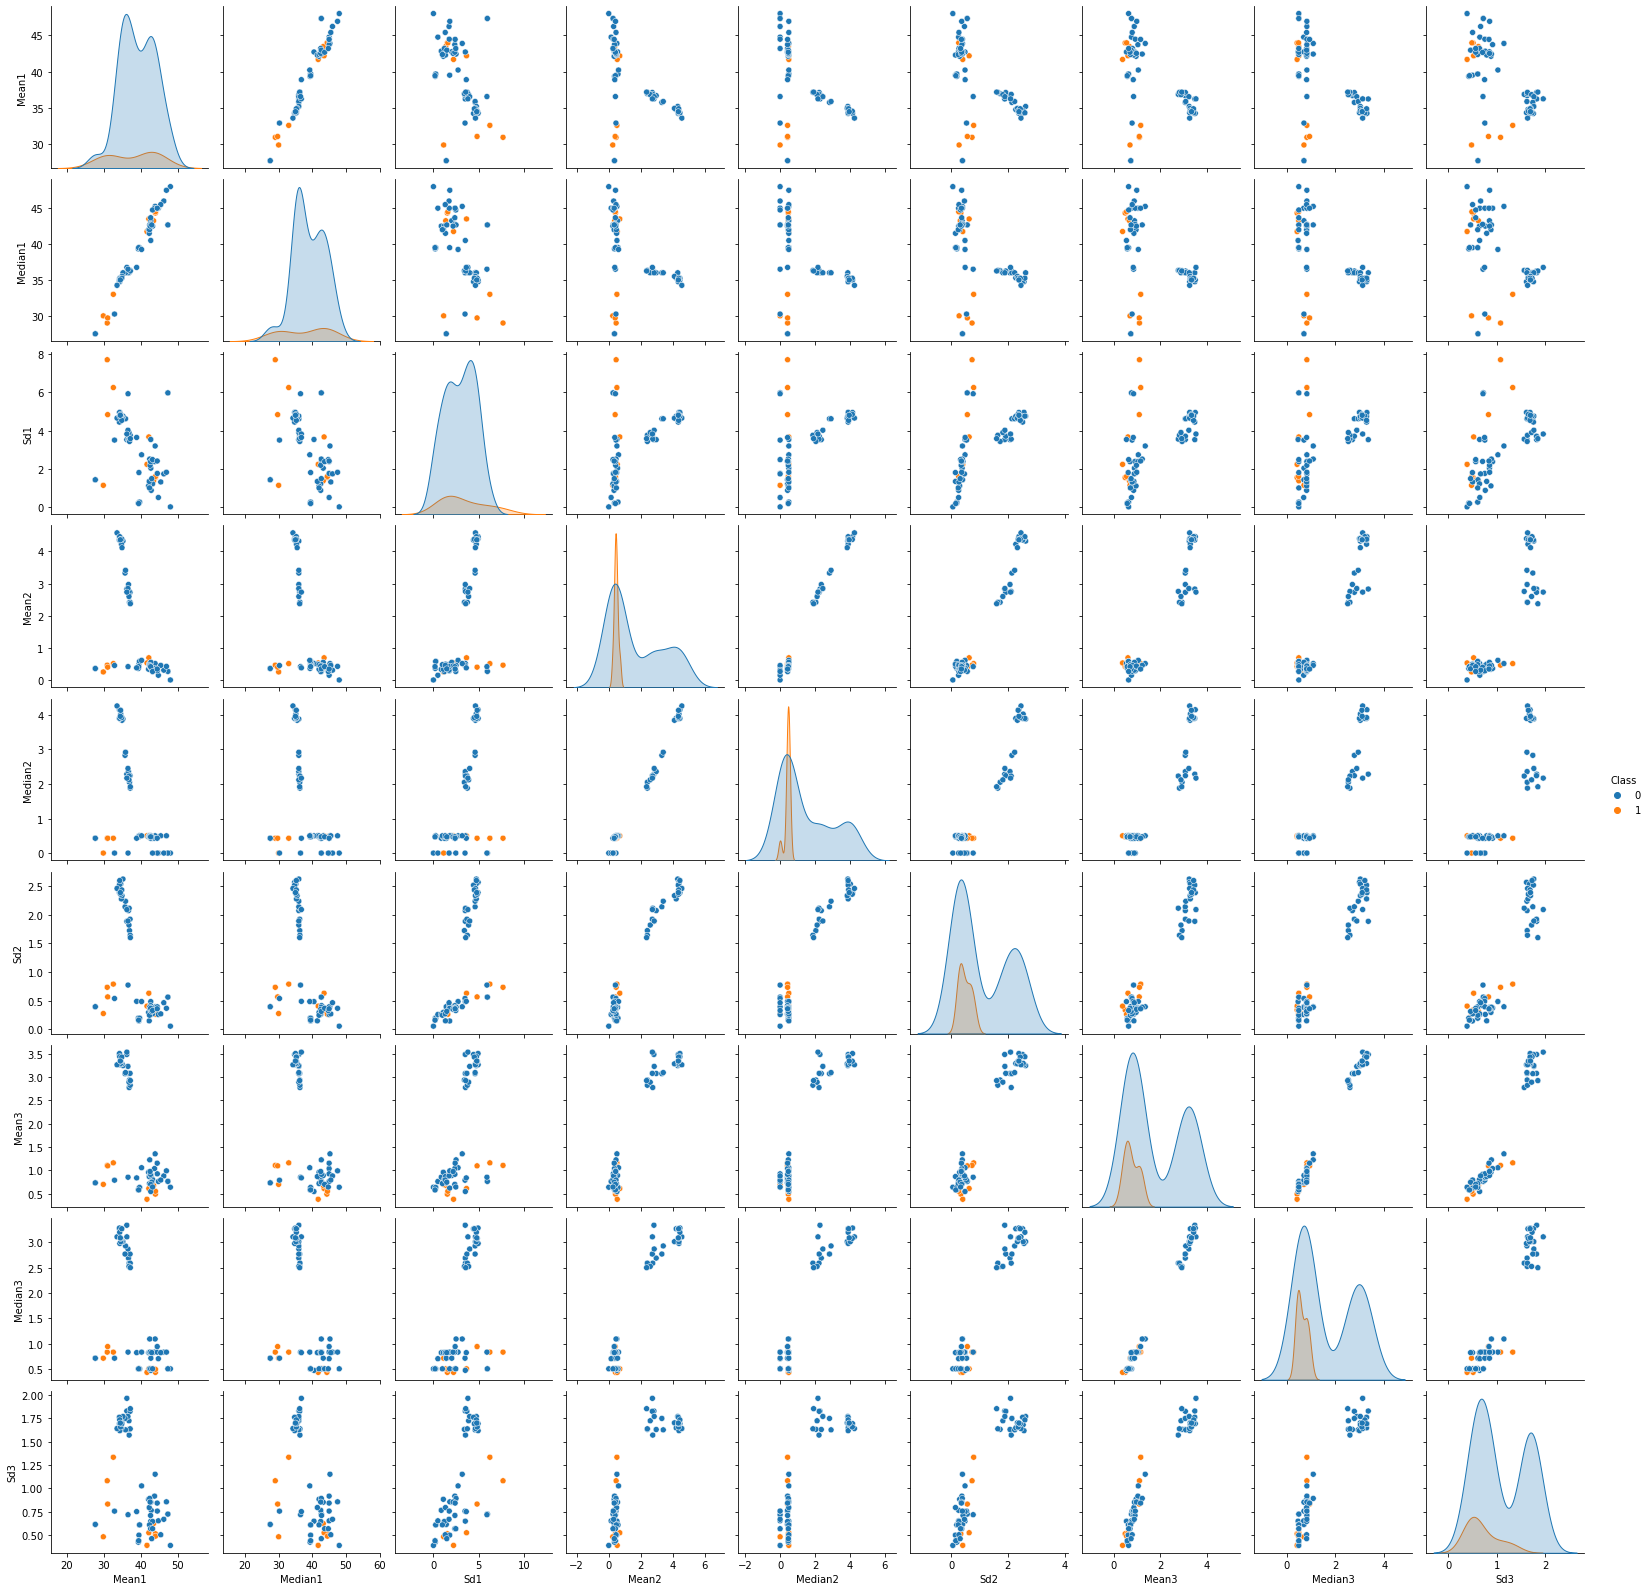

In [6]:
seaborn.pairplot(df_train_all, hue = 'Class', kind = 'scatter')

## A (ii)

In [7]:
# # confort traning df lists to a dataframe, besides each other. Vertically

# all_training_vertic = pd.concat(df_list_all_train,axis=1)
# del all_training_vertic['# Columns: time']
# all_training_vertic

In [7]:
# Break each time searies in your training set into two!! (12 time sieries for each dataset/instance)


generl_path = '../data/AReM/'
# To take a list of dataset names
# dataset_l = os.listdir('../data/AReM/lying')
folders = ['cycling','lying','sitting','standing','walking']
train_d= [ 'dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv', 'dataset8.csv', 'dataset9.csv', 'dataset10.csv', 'dataset11.csv', 'dataset12.csv', 'dataset13.csv', 'dataset14.csv', 'dataset15.csv']


# create df lists
df_list_other_train_features_cut = []
for folder in range(len(folders)):
    for file in range(len(train_d)):
        temp_df = pd.read_csv(generl_path+folders[folder]+'/'+train_d[file],skiprows=4)
     
        df_list = np.array_split(temp_df, 2)
        df_concat = pd.concat([df_list[0], df_list[1].reset_index()], axis=1)
        df_concat.drop(['# Columns: time', 'index'], axis=1, inplace=True)
        df_list_other_train_features_cut.append(df_concat)
        
        



     
train_b= [ 'dataset3.csv','dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv']

f = ['bending1','bending2']
df_list_bending_train_features_cut = []
for i in range(1):
    for file in range(len(train_b)):
        temp_df = pd.read_csv(generl_path+'bending1'+'/'+train_b[file],skiprows=4)
        df_list = np.array_split(temp_df, 2)
        df_concat = pd.concat([df_list[0], df_list[1].reset_index()], axis=1)
        df_concat.drop(['# Columns: time', 'index'], axis=1, inplace=True)
        df_list_bending_train_features_cut.append(df_concat)
    for file in range(len(train_b[:4])):
        temp_df = pd.read_csv(generl_path+'bending2'+'/'+train_b[file],skiprows=4)
        df_list = np.array_split(temp_df, 2)
        df_concat = pd.concat([df_list[0], df_list[1].reset_index()], axis=1)
        df_concat.drop(['# Columns: time','index'], axis=1, inplace=True)
        df_list_bending_train_features_cut.append(df_concat)




#all traning data dfs for both bending and others
df_list_all_features_train_cut = df_list_bending_train_features_cut+df_list_other_train_features_cut
print('After Breaking each timeseries into two for all the features')
display(df_list_all_features_train_cut[1])

After Breaking each timeseries into two for all the features


avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0        47.33       0.47      28.00       0.82      34.25       1.30   
1        47.50       0.50      29.00       1.22      36.00       0.00   
2        47.50       0.50      30.00       0.00      36.75       0.83   
3        47.00       0.71      28.00       1.22      37.00       1.22   
4        45.00       0.71      24.25       1.79      36.00       0.00   
..         ...        ...        ...        ...        ...        ...   
235      45.00       0.00      22.00       0.82      36.00       0.00   
236      45.25       0.43      24.00       0.00      36.50       0.50   
237      45.75       0.43      24.00       0.00      36.50       0.50   
238      45.25       0.43      23.00       1.22      36.25       0.43   
239      44.00       1.22      20.50       0.50      36.00       0.00   

     avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  
0        39.75       1.79      23.50       0.87      35.00       1.22  
1        36.67       0.94      26.00       1.22      34.67       1.25  
2        35.25       1.30      27.25       0.43      36.00       0.00  
3        36.67       0.94      26.00       1.41      34.50       1.50  
4        43.25       1.30      21.50       0.87      35.25       1.30  
..         ...        ...        ...        ...        ...        ...  
235      39.00       0.00      11.50       4.72      23.75       0.43  
236      41.50       0.50      22.25       1.92      26.25       1.30  
237      42.00       0.00      23.50       0.87      29.75       0.43  
238      42.50       0.50      21.00       0.00      30.00       0.00  
239      43.25       0.43      23.75       0.43      28.25       0.43  

[240 rows x 12 columns]

In [8]:
# Create train data


generl_path = '../data/AReM/'
# To take a list of dataset names
# dataset_l = os.listdir('../data/AReM/lying')
folders = ['cycling','lying','sitting','standing','walking']
train_d= [ 'dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv', 'dataset8.csv', 'dataset9.csv', 'dataset10.csv', 'dataset11.csv', 'dataset12.csv', 'dataset13.csv', 'dataset14.csv', 'dataset15.csv']


# create df lists
df_list_other_train_cut = []
for folder in range(len(folders)):
    for file in range(len(train_d)):
        temp_df = pd.read_csv(generl_path+folders[folder]+'/'+train_d[file],skiprows=4)
     
        df_list = np.array_split(temp_df, 2)
        df_concat = pd.concat([df_list[0], df_list[1].reset_index()], axis=1)
        df_concat.drop(['# Columns: time', 'avg_rss13', 'var_rss13', 'avg_rss23', 'index'], axis=1, inplace=True)
        df_list_other_train_cut.append(df_concat)
        
        



     
train_b= [ 'dataset3.csv','dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv']

f = ['bending1','bending2']
df_list_bending_train_cut = []
for i in range(1):
    for file in range(len(train_b)):
        temp_df = pd.read_csv(generl_path+'bending1'+'/'+train_b[file],skiprows=4)
        df_list = np.array_split(temp_df, 2)
        df_concat = pd.concat([df_list[0], df_list[1].reset_index()], axis=1)
        df_concat.drop(['# Columns: time', 'avg_rss13', 'var_rss13', 'avg_rss23', 'index'], axis=1, inplace=True)
        df_list_bending_train_cut.append(df_concat)
    for file in range(len(train_b[:4])):
        temp_df = pd.read_csv(generl_path+'bending2'+'/'+train_b[file],skiprows=4)
        df_list = np.array_split(temp_df, 2)
        df_concat = pd.concat([df_list[0], df_list[1].reset_index()], axis=1)
        df_concat.drop(['# Columns: time', 'avg_rss13', 'var_rss13', 'avg_rss23', 'index'], axis=1, inplace=True)
        df_list_bending_train_cut.append(df_concat)




#all traning data dfs for both bending and others
df_list_all_train_cut = df_list_bending_train_cut+df_list_other_train_cut
print('After Breaking each timeseries into two for only 3 features')
df_list_all_train_cut[1]

After Breaking each timeseries into two for only 3 features


avg_rss12  var_rss12  var_rss23  avg_rss12  var_rss12  var_rss23
0        47.33       0.47       1.30      39.75       1.79       1.22
1        47.50       0.50       0.00      36.67       0.94       1.25
2        47.50       0.50       0.83      35.25       1.30       0.00
3        47.00       0.71       1.22      36.67       0.94       1.50
4        45.00       0.71       0.00      43.25       1.30       1.30
..         ...        ...        ...        ...        ...        ...
235      45.00       0.00       0.00      39.00       0.00       0.43
236      45.25       0.43       0.50      41.50       0.50       1.30
237      45.75       0.43       0.50      42.00       0.00       0.43
238      45.25       0.43       0.43      42.50       0.50       0.00
239      44.00       1.22       0.00      43.25       0.43       0.43

[240 rows x 6 columns]

In [9]:
variables = ['avg_rss12', 'var_rss12', 'var_rss23', 'avg_rss12_2', 'var_rss12_2', 'var_rss23_2']

col_names = []
for i in variables:

    col_names.append('Mean_'+i)
    col_names.append('Median_'+i)
    col_names.append('Sd_'+i)


df_col_other = pd.DataFrame(columns=col_names)
    
for df in df_list_other_train_cut:
    lis_stat = []     
        
    for n in range(0,len(df.columns)):
        column = df.iloc[:, n]
        lis_stat.append(column.mean())
        lis_stat.append(column.median())
        lis_stat.append(column.std())
    df_col_other.loc[len(df_col_other.index)] = lis_stat
df_col_other['Class']='unbending'


df_col_ben = pd.DataFrame(columns=col_names)   
for df in df_list_bending_train_cut:
    lis_stat = []     
        
    for n in range(0,len(df.columns)):
        column = df.iloc[:, n]
        lis_stat.append(column.mean())
        lis_stat.append(column.median())
        lis_stat.append(column.std())
    df_col_ben.loc[len(df_col_ben.index)] = lis_stat
df_col_ben['Class']='bending'

df_cut_all = pd.concat([df_col_ben,df_col_other])
display(df_cut_all)
# df_cut_all

Mean_avg_rss12  Median_avg_rss12  Sd_avg_rss12  Mean_var_rss12  \
0        44.057167            44.500      1.556971        0.381042   
1        43.278875            45.000      3.473355        0.673292   
2        41.621208            42.330      3.118644        0.623083   
3        44.117042            45.000      1.359836        0.250042   
4        43.486208            43.710      1.281976        0.378667   
..             ...               ...           ...             ...   
55       33.334500            34.000      4.874433        4.408083   
56       34.036750            34.415      4.872880        4.778292   
57       34.033875            35.000      4.758757        4.574625   
58       34.920792            35.330      4.272282        4.177958   
59       34.916792            35.375      4.634209        4.262333   

    Median_var_rss12  Sd_var_rss12  Mean_var_rss23  Median_var_rss23  \
0              0.470      0.329540        0.598250             0.500   
1              0.485      0.634285        0.640958             0.765   
2              0.500      0.489595        0.419083             0.430   
3              0.000      0.314099        0.815417             0.710   
4              0.470      0.284434        0.524875             0.470   
..               ...           ...             ...               ...   
55             4.195      2.196206        3.229167             3.110   
56             4.030      2.762730        3.543708             3.255   
57             4.470      2.391804        3.244042             2.980   
58             3.865      2.341763        3.430625             3.270   
59             3.850      2.396878        3.439917             3.200   

    Sd_var_rss23  Mean_avg_rss12_2  Median_avg_rss12_2  Sd_avg_rss12_2  \
0       0.526656         43.851833              43.500        1.557168   
1       0.554542         41.080750              42.000        3.537481   
2       0.411200         41.734917              41.500        0.595920   
3       0.718016         42.792875              42.670        1.058792   
4       0.486847         44.452042              44.500        1.771251   
..           ...               ...                 ...             ...   
55      1.637310         33.839250              34.500        4.411903   
56      1.703098         34.608750              35.500        4.621400   
57      1.619767         35.058583              35.875        4.880650   
58      1.781928         34.825667              35.250        4.785599   
59      1.737420         34.029583              34.500        4.923609   

    Mean_var_rss12_2  Median_var_rss12_2  Sd_var_rss12_2  Mean_var_rss23_2  \
0           0.471458               0.500        0.342346          0.388333   
1           0.718792               0.500        0.627915          0.586083   
2           0.448875               0.500        0.273050          0.347500   
3           0.506125               0.500        0.260761          0.543875   
4           0.447583               0.500        0.235493          0.585750   
..               ...                 ...             ...               ...   
55          4.745042               4.320        2.694219          3.290292   
56          4.134375               3.740        2.387460          3.321417   
57          4.169292               3.880        2.315929          3.432208   
58          4.583208               4.070        2.514203          3.418667   
59          4.456292               4.195        2.381634          3.241000   

    Median_var_rss23_2  Sd_var_rss23_2      Class  
0                0.000        0.478528    bending  
1                0.470        0.491873    bending  
2                0.430        0.363144    bending  
3                0.500        0.473445    bending  
4                0.500        0.487918    bending  
..                 ...             ...        ...  
55               3.155        1.646023  unbending  
56               3.155        1.758379  unbending  
57  

In [10]:
df_cut_all.replace('bending',1,inplace=True)
df_cut_all.replace('unbending',0,inplace=True)


In [11]:
df_cut_all = df_cut_all.reset_index(drop=True)

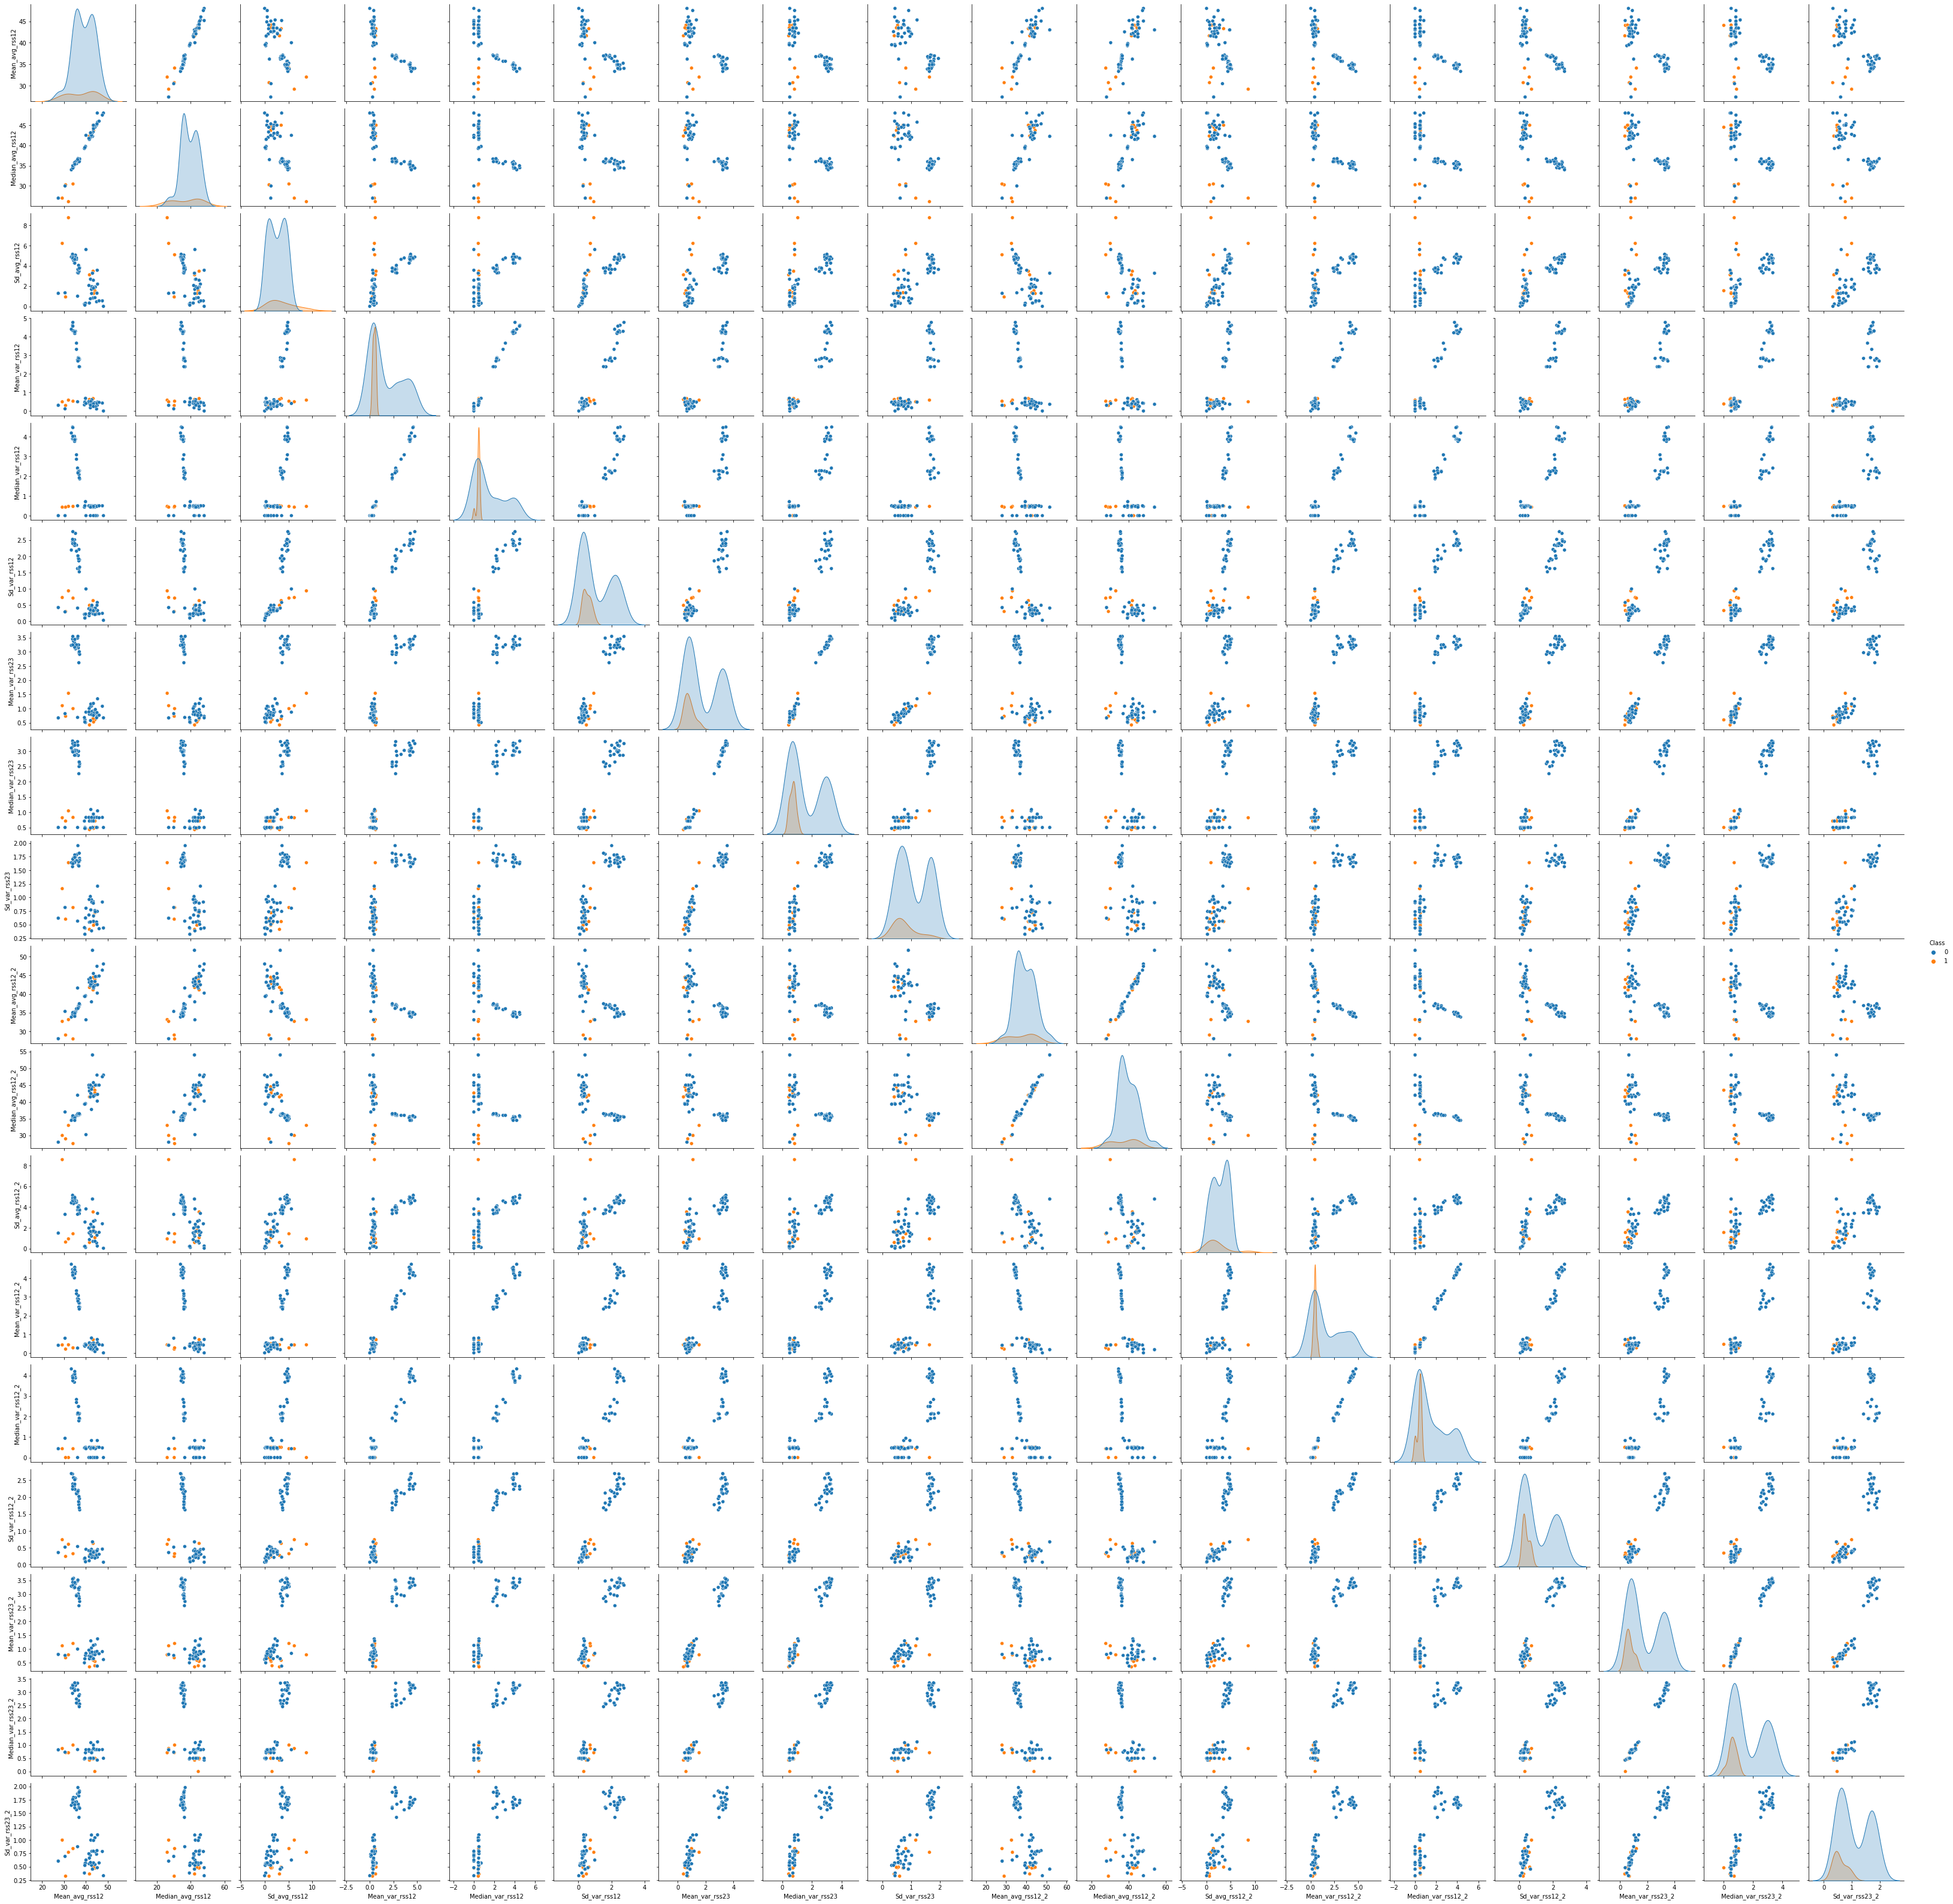

In [12]:
seaborn.pairplot(df_cut_all, hue = 'Class', kind = 'scatter')

There is not a big difference in the resul between i and ii but I notice that because there are more features that fit our modle in ii the performance imporved a little bit than in the result of i. What I mean is that ii was a bit clear in classifing the lable.

# A (iii)

In [35]:
# GOOOD CUT DATASETS 

# All parts of traing data 

df_list_train_20_split = []
for l in range(1,21):  
    for df in df_list_all_train:
        if l > 1: 
            listDataframe = np.array_split(df, l)
            concatDataframe = pd.concat([listDataframe[0], listDataframe[1].reset_index()], axis=1)
            if l > 2:
                for s in range(2,l):
                    concatDataframe = pd.concat([concatDataframe, listDataframe[s]], axis=1)
            concatDataframe.drop(['index'], axis=1, inplace=True)
            df_list_train_20_split.append(concatDataframe)
        else:
            df_list_train_20_split.append(df)
len(df_list_train_20_split)


1380

In [19]:
#I do not need it.




#source data
df_list_bending_train
df_list_other_train


#************************************************************
#Other Training

#To remove first col
# for df in df_list_other_train:
#     df.drop(['# Columns: time'], axis=1, inplace=True)

#To make sure it was removed 
#display(df_list_other_train[1])


# List has all dfs with 20 split related to other train
df_list_other_train_20_split = []

for l in range(1,21):  
    for df in df_list_other_train:
        if l > 1: 
            listDataframe = np.array_split(df, l)
            concatDataframe = pd.concat([listDataframe[0], listDataframe[1].reset_index()], axis=1)
            if l > 2:
                for s in range(2,l):
                    concatDataframe = pd.concat([concatDataframe, listDataframe[s]], axis=1)
            concatDataframe.drop(['index'], axis=1, inplace=True)
            df_list_other_train_20_split.append(concatDataframe)
        else:
            df_list_other_train_20_split.append(df)
print(len(df_list_other_train_20_split))

#************************************************************************************
#Bending Traning

# To make sure the first col(timing is removed)
# display(df_list_bending_train[6])   


# List has all dfs with 20 split related to bending train
df_list_bending_train_20_split = []

for l in range(1,21):  
    for df in df_list_bending_train:
        if l > 1: 
            listDataframe = np.array_split(df, l)
            concatDataframe = pd.concat([listDataframe[0], listDataframe[1].reset_index()], axis=1)
            if l > 2:
                for s in range(2,l):
                    concatDataframe = pd.concat([concatDataframe, listDataframe[s]], axis=1)
            concatDataframe.drop(['index'], axis=1, inplace=True)
            df_list_bending_train_20_split.append(concatDataframe)
        else:
            df_list_bending_train_20_split.append(df)
len(df_list_bending_train_20_split)

1200


180

In [36]:


all_train_stat = []

for df in df_list_train_20_split:
    s_lst = []
    for col in range(0,len(df.columns)):
        column = df.iloc[:, col]
        s_lst.append(column.mean())
        s_lst.append(column.median())
        s_lst.append(column.std())
    all_train_stat.append(s_lst)
print(len(all_train_stat))


    

1380


In [37]:



l1 = pd.DataFrame(all_train_stat[0:69])
l2 = pd.DataFrame(all_train_stat[69:138])
l3 = pd.DataFrame(all_train_stat[138:207])
l4 = pd.DataFrame(all_train_stat[207:276])
l5 = pd.DataFrame(all_train_stat[276:345])
l6 = pd.DataFrame(all_train_stat[345:414])
l7 = pd.DataFrame(all_train_stat[414:483])
l8 = pd.DataFrame(all_train_stat[483:552])
l9 = pd.DataFrame(all_train_stat[552:621])
l10 = pd.DataFrame(all_train_stat[621:690])
l11 = pd.DataFrame(all_train_stat[690:759])
l12 = pd.DataFrame(all_train_stat[759:828])
l13 = pd.DataFrame(all_train_stat[828:897])
l14 = pd.DataFrame(all_train_stat[897:966])
l15 = pd.DataFrame(all_train_stat[966:1035])
l16 = pd.DataFrame(all_train_stat[1035:1104])
l17 = pd.DataFrame(all_train_stat[1104:1173])
l18 = pd.DataFrame(all_train_stat[1173:1242])
l19 = pd.DataFrame(all_train_stat[1242:1311])
l20 = pd.DataFrame(all_train_stat[1311:1380])

list_l = [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20]
train_class = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for item in list_l:
    item['Class']=train_class


In [38]:
print('Nunmber of bending (1) class is : ',list_l[1]['Class'].value_counts()[1])
print('Nunmber of unbending (0) class is : ',list_l[1]['Class'].value_counts()[0])

Nunmber of bending (1) class is :  9
Nunmber of unbending (0) class is :  60


<br> 
My data is imbalance because I have 60 of class 0 instance compare to class 1 which olny have 9. Because of that I will use stratified cross validaton on all the datasets. 

# Q: What is the right way and the wrong way to perform cross-validation in this problem?

<br>
The right way is to select predictors first then do cross-validation, The wrong way is to do cross-validation then choose the predictors. 

In [81]:
from numpy import unravel_index
list_score =[]
l = 0
t = []

for df in list_l:
    X_train = df.drop(columns='Class')
    y_train = df['Class']
    model = LogisticRegression(max_iter=1000) #modle
    stratifiedCV = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    selector = RFECV(estimator=model, step=1 ,cv=stratifiedCV)
    selector = selector.fit(X_train,y_train)
#     sco = selector.grid_scores_
#     score_max  = [max(i) for i in sco]
    p_value = selector.n_features_
    t.append(selector.support_)
    score = selector.score(X_train,y_train)
    list_score.append(score)
    
    print('l=',l+=1,' p=',p_value,'  score=',score )
    

    

    

l= 1  p= 6   score= 1.0
l= 2  p= 10   score= 1.0
l= 3  p= 1   score= 0.9710144927536232
l= 4  p= 1   score= 0.8695652173913043
l= 5  p= 1   score= 0.9710144927536232
l= 6  p= 1   score= 0.9420289855072463
l= 7  p= 2   score= 0.9710144927536232
l= 8  p= 1   score= 0.9710144927536232
l= 9  p= 7   score= 1.0
l= 10  p= 9   score= 1.0
l= 11  p= 9   score= 1.0
l= 12  p= 1   score= 0.9855072463768116
l= 13  p= 1   score= 0.9710144927536232
l= 14  p= 1   score= 0.9710144927536232
l= 15  p= 1   score= 0.9710144927536232
l= 16  p= 7   score= 1.0
l= 17  p= 4   score= 1.0
l= 18  p= 12   score= 1.0
l= 19  p= 14   score= 1.0
l= 20  p= 1   score= 0.9855072463768116


In [91]:
# Run logistic regression on the best l
X_train = list_l[19].drop(columns='Class')
y_train = list_l[19]['Class']
model = LogisticRegression(max_iter=1000) #modle
stratifiedCV = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
selector = RFECV(estimator=model, step=1 ,cv=stratifiedCV)
selector = selector.fit(X_train,y_train)
p_value = selector.n_features_
score = selector.score(X_train,y_train)
New_X_train= X_train.loc[:, selector.support_]


In [94]:
New_X_train = sm.add_constant(New_X_train)
model = sm.Logit(y_train, New_X_train).fit(method="bfgs")
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.068476
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.8232
Time:                        21:44:34   Log-Likelihood:                -4.7249
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 3.308e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.1514      9.128     -

# ISLR, 4.8.3

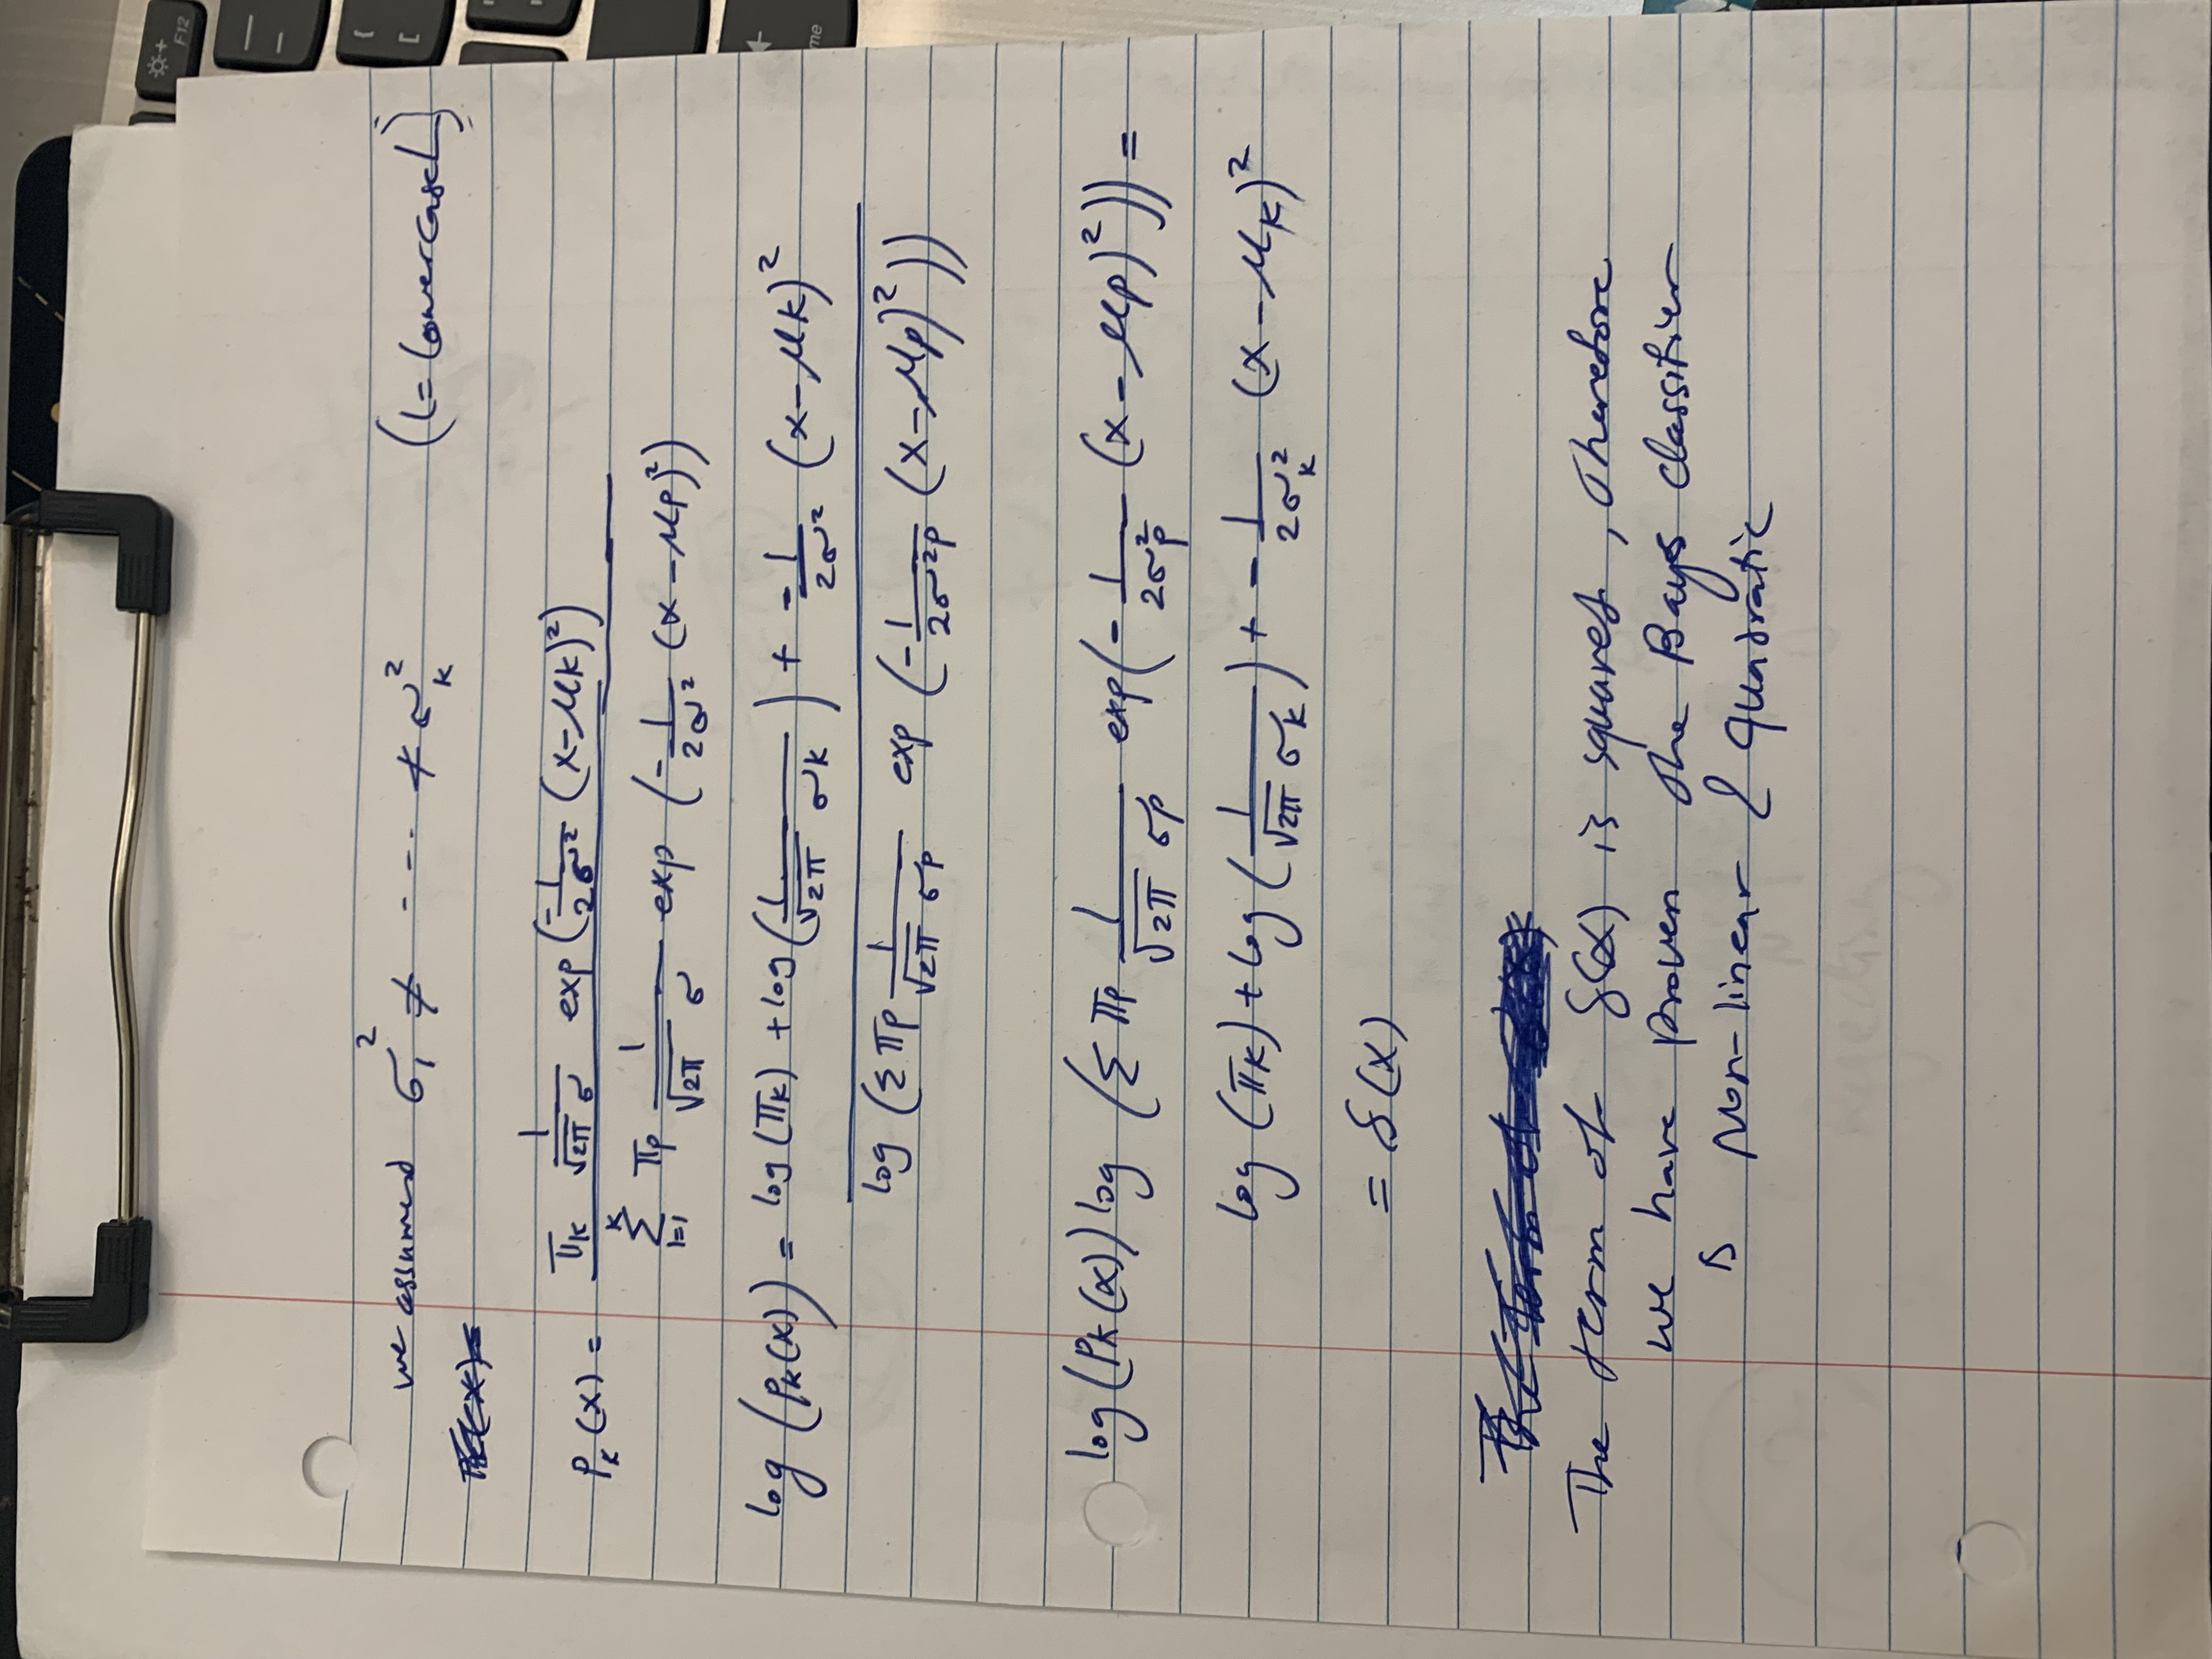

# ISLR 4.8.7

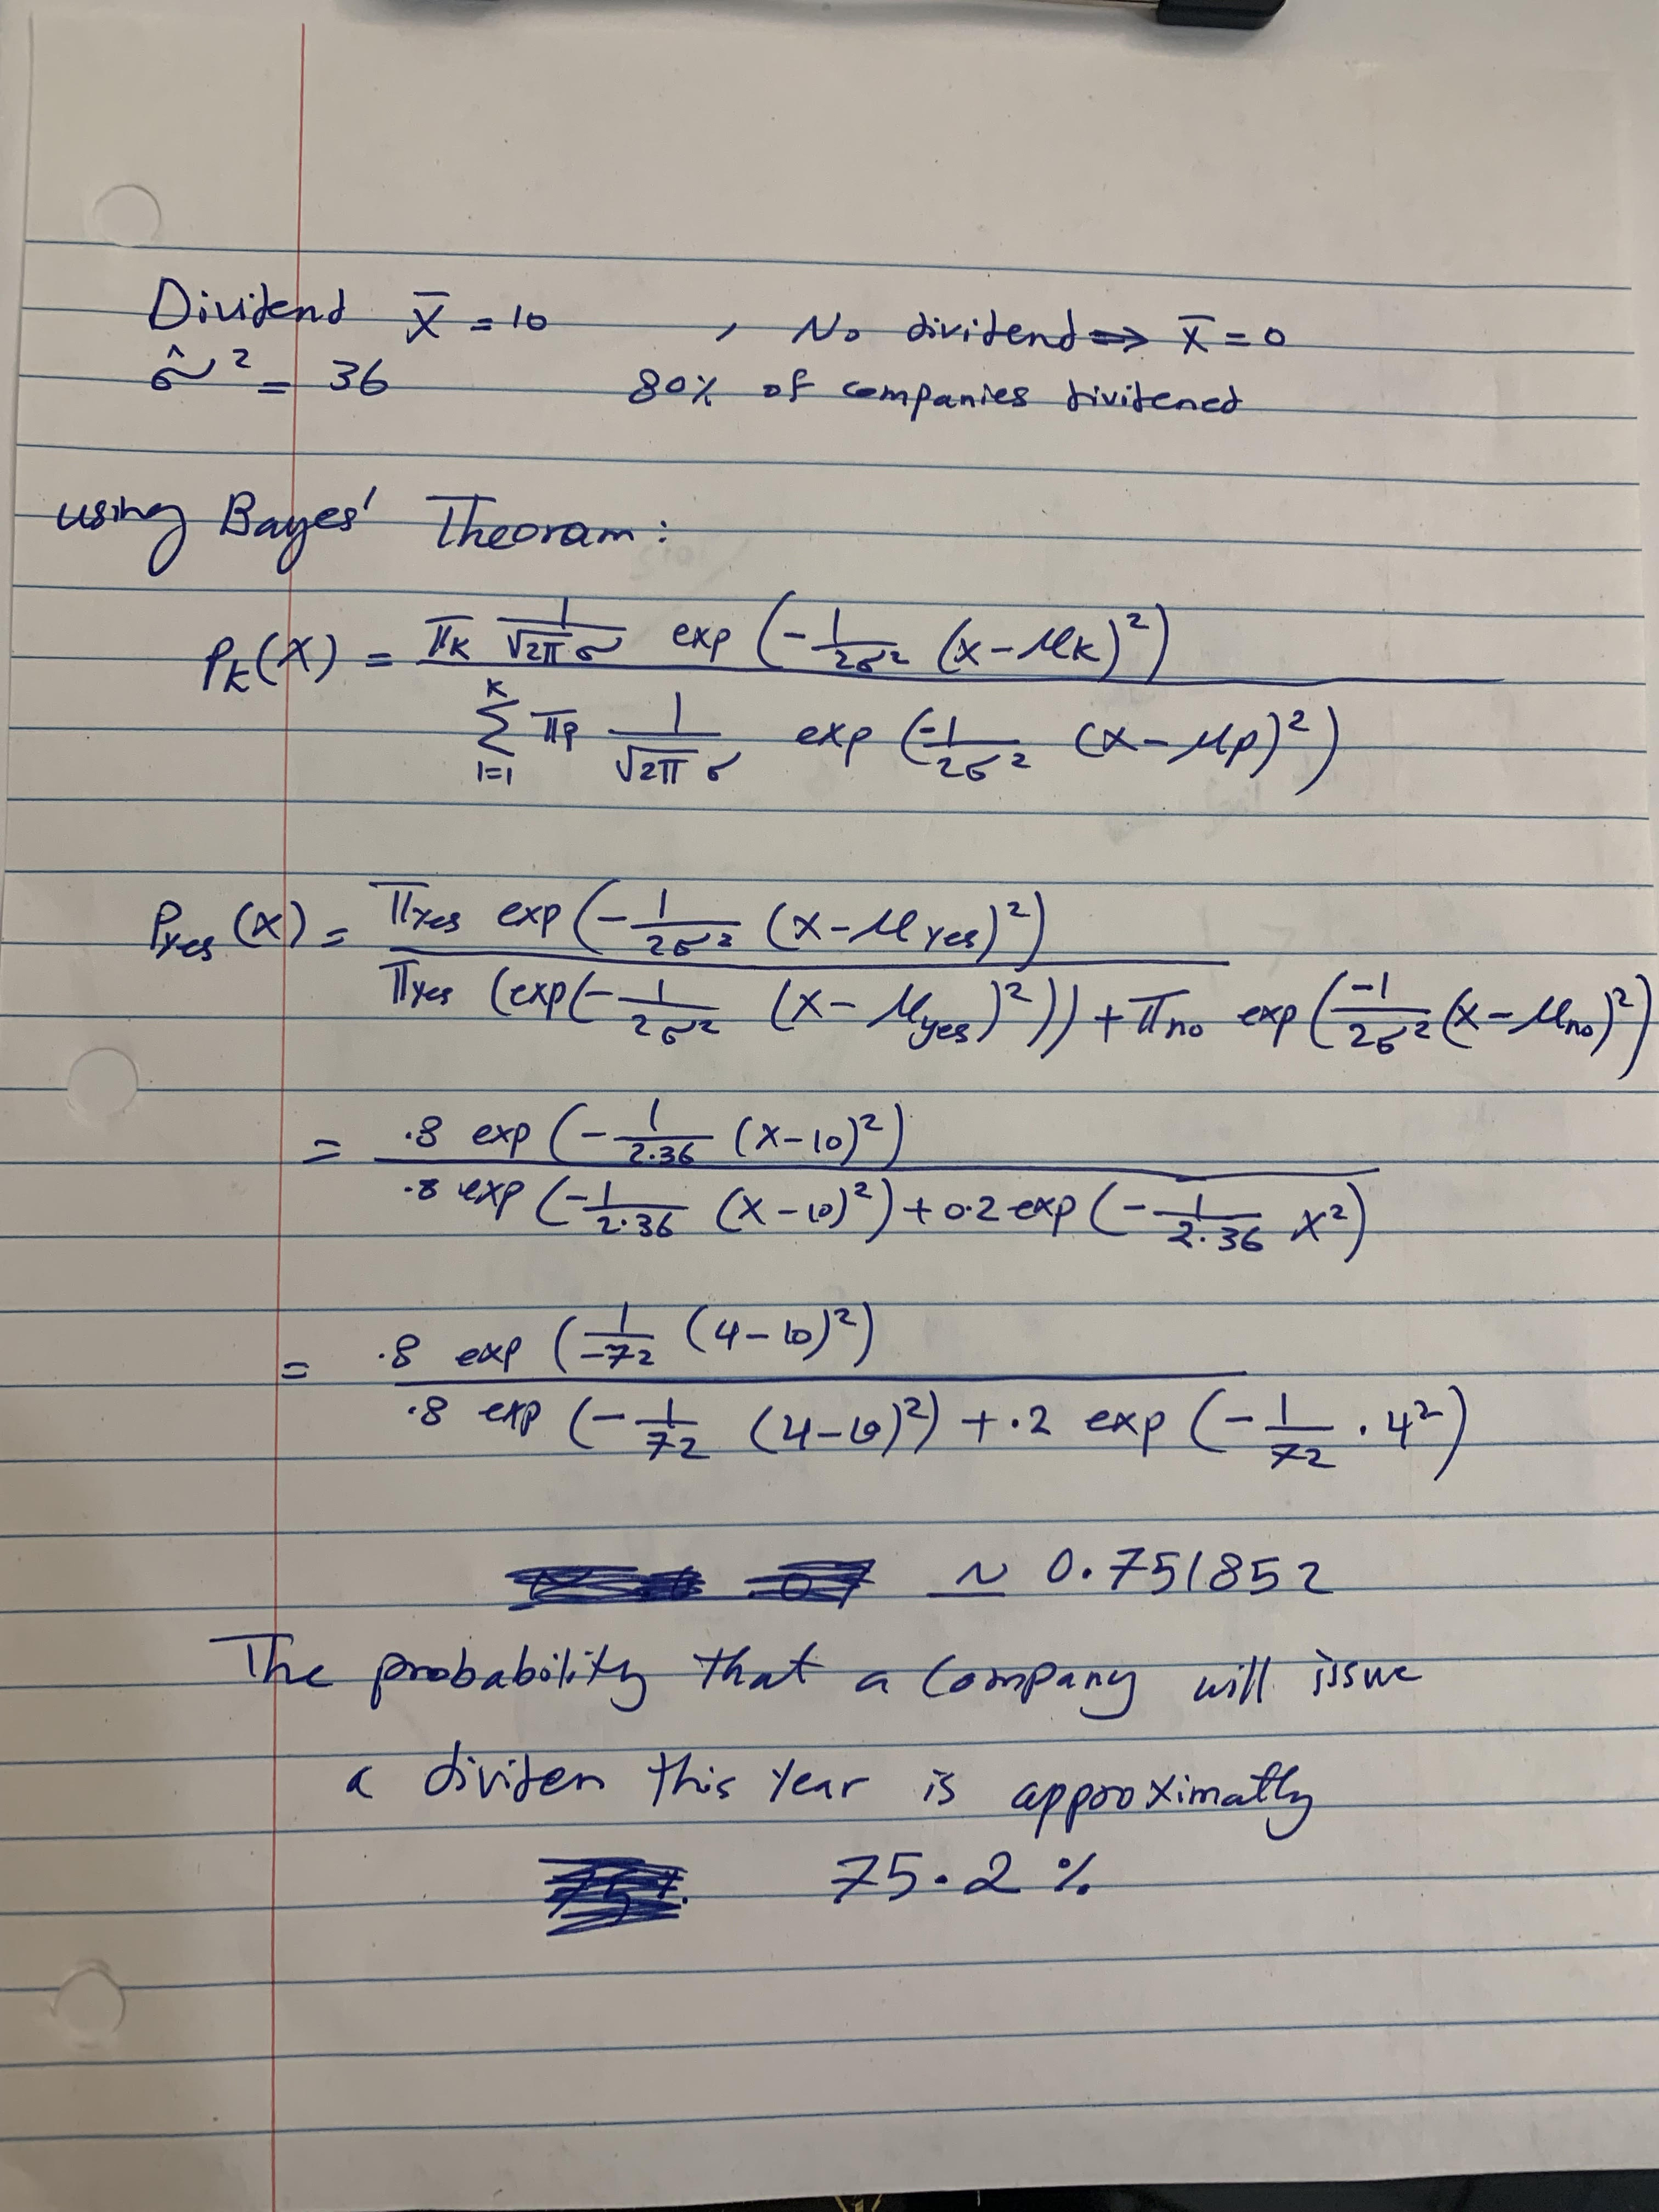